#Financial Fraud Detection_Project

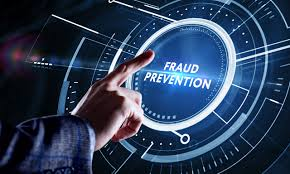

##About Financial Fraud Detection

Financial fraud detection is the process of identifying and preventing fraudulent activities within financial systems, including but not limited to transactions, accounts, and data. It aims to minimize financial losses, protect assets, and maintain customer trust by using various techniques and technologies to monitor transactions and user behavior for unusual patterns or anomalies.

###Importing the libraries for analyzing the Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [5]:
# check the datat ypes
df.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [6]:
# Statistical Summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [7]:
# memory storage
df.memory_usage()

,0
Index,132
Time,47792
V1,47792
V2,47792
V3,47792
V4,47792
V5,47792
V6,47792
V7,47792
V8,47792


In [8]:
# check the columns and rows
df.shape

(5974, 31)

In [9]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
# Check and handle missing values in the 'Class' column
df = df.dropna(subset=['Class'])  # Drop rows where Class is NaN

In [11]:
# Convert 'Class' to integer
df['Class'] = df['Class'].astype(int)

<ipython-input-11-019d289098a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].astype(int)


In [12]:
# Optional: Check for other missing values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
# Splitting features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [14]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify to handle class imbalance
)

In [15]:
# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predictions
y_pred = clf.predict(X_test)

In [17]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-18-e972774dbe8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


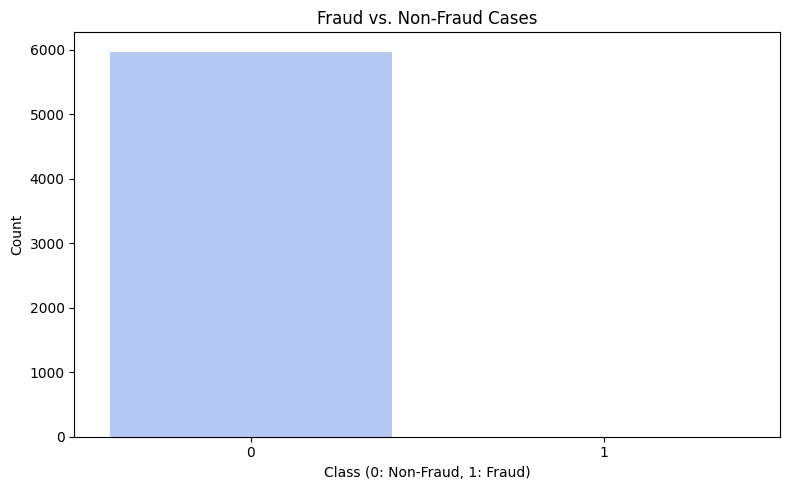

In [18]:
# Fraud case visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='coolwarm')
plt.title('Fraud vs. Non-Fraud Cases')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Approach: Engineered a fraud detection framework leveraging imbalanced data handling, supervised machine learning, and anomaly detection using a Random Forest Classifier to optimize classification performance on skewed financial datasets.

Insight: Identified high-risk transactional behaviors through predictive analytics, enabling proactive fraud mitigation, enhanced financial security, and data-driven risk management strategies.